# 학습내용

[1] 합성곱 신경망

[2] CNN으로 MNIST 분류

[3] 개/고양이 분류

[4] 전이학습

#[1] Convolution Neural Network (CNN)

- 컨볼루션을 이용해서 이미지의 특성을 추출하는 전처리기 신경망
- CNN은 Convolution 층과 Pooling 층으로 구성
   - Convolution 층 : 입력데이터에서 특성을 추출
   - Pooling 층 : 추출된 특성이미지의 크기를 축소 (DownSampling)
     - 주로 MaxPooling을 사용

- 이전 학습에서는 2차원 이미지를 1차원으로 변하여 학습을 수행
  - 변환 전에 가지고 있던 공간적인 구조(근방 픽셀간의 연관성) 정보가 유실
  - 원래 어떤 이미지였는지 알아보기가 어려움

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn1.png" width=40%>   
</center>  


- CNN은 다차원 데이터를 사용할 수 있으므로 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있음

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn15.png" width=50%> <br>
<font size=1>https://blog.joonas.io/196</font>  
</center>  

## 채널
- 흑백이미지는 1개의 채널로 구성 (가로 x 세로 x 1)
- 컬러 이미지는 적색(Red), 녹색(Green), 청색(Blue)의 3개의 채널로 구성  (가로 x 세로 x 3)

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn2.png" width=20%>   
</center>  

- 이미지는 (너비, 높이, 채널)라는 3차원 텐서로 표현

## convolution 원리

- 커널(kernel) 또는 필터(filter)라는 크기의 행렬로 이미지를 처음부터 끝까지 겹치며 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력하는 것  
  - 커널(kernel)은 일반적으로 3 × 3 또는 5 × 5를 사용

- 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 이동

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn3.png" width=40%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn4.png" width=40%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn5.png" width=40%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn6.png" width=40%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn14.gif" width=20%><br>
<font size=1>https://blog.joonas.io/196</font>
</center>  

- 최종 특성 맵 (feature map) 이미지

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn7.png" width=10%>   
</center>  



## stride

- 커널의 이동 범위를 의미
- stride에 따라 특성맵 이미지의 크기가 변경
  - Pooling이 속도가 느리므로 stride를 이용해서 크기를 줄이기도 함
- 일반적으로 3 × 3인 경우는 1-3, 5 × 5인 경우는 1-5까지 설정 가능
- 커널 크기에 비해 큰 값으로 stride를 설정하면 이미지의 일부가 제외되어 연산이 되므로 이미지의 지역적 특성이 반영되지 않을 수 있음

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn9.png" width=50%>   
</center>  

## 특성 맵의 크기

- 5x5 이미지에 3x3 커널을 사용하고 stride를 1로 설정한 경우
<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_feature_map_size.png" width=50%>   
</center>  


- 5x5 이미지에 3x3 커널을 사용하고 stride를 2로 설정한 경우
<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_feature_map_size2.png" width=50%>   
</center>  

## padding

- 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아짐
- 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 됨

- <font color=red>padding</font> : 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하는 것

- <font color=red>zero padding</font> 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 0으로 채운 행과 열을 추가해주는 것

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn10.png" width=50%>   
</center>  

## 합성곱 신경망의 편향 (bias)

- 편향은 퍼셉트론에 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해짐


<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn11.png" width=20%>   
</center>  

## 칼라 이미지의 합성곱

- 칼라 이미지는 3개의 채널 (Red, Green, Blue)로 구성
- 칼라 이미지가 CNN의 입력이 되면 채널별로 컨볼루션을 수행하고 각 특성맵 이미지 값을 합해서 칼라이미지의 특성맵 이미지를 계산

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn12.png" width=30%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn17.png" width=40%>  <br>
<font size=1>https://blog.joonas.io/196</font>
</center>  

## pooling

- 풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 (downsampling) 풀링 연산 수행
  - max pooling : 최대값을 대표값으로 선정
  - average pooling : 평균값으로 대표값으로 선정

- 풀링 연산에서도 스트라이드를 사용하여 크기를 더 줄일 수 있음 (downsampling)

- 다만 풀링 연산은 전체 신경망 연산의 60% 이상을 차지하는 것이 문제

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn13.png" width=30%>   
</center>  

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_cnn16.gif" width=30%><br>   
<font size=1>https://blog.joonas.io/196</font>
</center>  

# [2] CNN으로 MNIST 분류

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/딥러닝 기초 25.07.11 (class 2)

/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)


- 라이브러리 등록

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from copy import deepcopy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# 데이터셋을 배치로 묶어주고, 셔플/병렬 처리 등을 지원하는 도구

from sklearn.model_selection import train_test_split

- GPU 설정 및 랜덤 시드 고정
  - 초기 가중치 파라미터를 동일한 값으로 하기 위한 시드 설정

In [4]:
import random # 난수 생성기(파이썬 라이브러리)

In [5]:
# 보통 난수 생성기 시드 고정을 한 번에 묶어서 처리하는 함수
def set_seed(seed: int = 2025):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # 보통 최적화 때문에 매번 다른 결과가 나오게 됨
    # 매번 동일한 결과가 나오게끔 하고자, 비결정적 최적화 끄기
    torch.backends.cudnn.deterministic = True

    # 연산 성능 최적화 시키기 위한 자동 탐색 기능 - 매번 같은 알고리즘 경로를 사용하도록 고정
    torch.backends.cudnn.benchmark = False

In [6]:
set_seed(2025) # 재현성 확보

In [7]:
# GPU 환경여부에 따라 device 세팅
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

- 데이터 준비

In [9]:
train = datasets.MNIST("./data", train = True, transform = transforms.Compose([ transforms.ToTensor() ]))
test = datasets.MNIST("./data", train = False, transform = transforms.Compose([ transforms.ToTensor() ]))

In [12]:
train.data.shape, test.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

- 학습 파라미터 정의

In [19]:
learning_rate = 1e-3 # adam 기본 학습률, 0.001

n_epochs = 15

batch_size = 256
print_interval = 1

lowest_loss = np.inf
early_stop = 5
lowest_epoch = np.inf

- 데이터 로더 생성
  - 데이터로더를 사용하여 배치 크기에 따라 데이터를 분리

  - DataLoader 클래스 기능
    - data의 batch 생성 : 여러개의 데이터를 묶어서 가져오는 역할
    - 학습 직전에 데이터 변환 → GPU에 feed 하기 전 실행
    - Tensor 변환 + batch 처리

In [33]:
# 훈련 데이터 로더
train_loader = DataLoader(
    dataset = train,
    batch_size = batch_size,
    shuffle = True,
    drop_last = True        # 미니 배치가 정해둔 batch_size보다 작으면 해당 배치를 버림 (과적합 방지용)
)

# 테스트 데이터 로더
test_loader = DataLoader(
    dataset = test,
    batch_size = batch_size,
    shuffle = True,
    drop_last = True
)

print(len(train_loader))
print(len(test_loader))

234
39


- 신경망 설계

In [34]:
# 1. 클래스 정의
class CNN(nn.Module) :
    # 2. 생성자 메서드 정의
    def __init__(self, ) :
        super().__init__()

        # 3. 속성 정의(인스턴스 변수 정의)

        # 특성추출부 -----------------------
        self.layer1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1, # 회색조는 채널이 1ea (컬러이미지는 3ea → RGB)
                out_channels = 32, # 특성맵을 32ea 생성 (커널의 개수) → Conv2d를 통과하면 32ea의 28*28 특성맵 생성
                kernel_size = 3, # 3*3 크기로 커널 크기 설정
                stride = 1,      # 커널의 보폭
                padding = 1      # 테두리에 1픽셀씩 0으로 채우겠다
            ),
            nn.ReLU(),           # 비선형성을 부여
                                # 강한 특징값(양수)값들은 그대로 유지, 불필요한 신호(음수)값들은 제거
            nn.MaxPool2d(
                kernel_size = 2, # 풀링 윈도우 크기
                stride = 2       # 2칸씩 건너뛰며 다운샘플링 → 14*14
            )
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # 14*14 → 7*7
        )

        # 출력텐서 : (batch_size, 64, 7, 7)
        # 1차원(Flatten)으로 펼쳐서 fc(완전연결층)에 입력

        # 분류부 -----------------------
        self.fc = nn.Linear(
            in_features = 64 * 7 * 7,
            out_features = 10,        # 클래스 개수
            bias = True        # 편향 사용 여부 : 편향 파라미터 추가
        )

        # 제비어 균등분포
        nn.init.xavier_uniform_(self.fc.weight)
        # 각 층의 출력값 분산이 입력값의 분산과 비슷한 수준이 되도록 가중치 분포를 조절

    # 4. forward 메서드 정의
    def forward(self, x) :
        h = self.layer1(x)    # 통과 : (B, 1, 28, 28) → (B, 32, 14, 14)
        h = self.layer2(h)    # 통과 : (B, 32, 14, 14) → (B, 64, 7, 7)
        h = h.view(h.size(0), -1) # 통과 : (B, 64, 7, 7) → (B, 64*7*7)
        y = self.fc(h)         # 통과 : (B, 64*7*7) → (B, 10)
        return y

In [35]:
# 초기화 + 디바이스 이동
model = CNN().to(device)

- 손실함수, 최적화 함수 설정

In [36]:
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

- 모델 훈련

In [37]:
train_acc_history, valid_acc_history = [], []   # 정확도
train_loss_history, valid_loss_history = [], [] # 손실값

best_model = None # 모델 가중치 저장 변수
best_epoch = None

In [38]:
# 학습 반복 루프 수행
for epoch in tqdm(range(n_epochs), desc = "Training Epochs") :
    # 에폭별 누적되는 정확도, 손실 초기화
    epoch_train_accuracy = 0.0
    epoch_train_loss = 0.0

    # 모델을 학습 모드
    model.train()

    # 학습
    for images, labels in train_loader :
        # 문제, 정답 GPU/CPU로 이동
        images, labels = images.to(device), labels.to(device)

        # 기울기 초기화
        optimizer.zero_grad()

        outputs = model(images) # 순전파
        loss = loss_func(outputs, labels) # 로짓값에 대해 오차계산

        # 정확도 계산
        preds = torch.argmax(outputs, dim = 1) # 예측값
        correct_mask = (preds == labels) # 불리안 마스크
        batch_accuracy = correct_mask.float().mean().item()

        loss.backward()  # 기울기 계산
        optimizer.step() # 업데이트

        # 배치별로 정확도, 손실값을 누적 변수에 누적
        epoch_train_accuracy += batch_accuracy
        epoch_train_loss += loss.item()

    # 에폭당 평균 정확도, 손실값
    epoch_train_accuracy /= len(train_loader)
    epoch_train_loss /= len(train_loader)

    # 검증루프
    model.eval()
    epoch_val_accuracy = 0.0
    epoch_val_loss = 0.0

    with torch.no_grad() :
        for val_images, val_labels in test_loader :
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            # 순전파, 오차계산
            val_outputs = model(val_images)
            val_loss = loss_func(val_outputs, val_labels)

            # 검증 정확도
            val_preds = torch.argmax(val_outputs, dim = 1) # 예측값
            val_correct_mask = (val_preds == val_labels) # 불리안 마스크
            val_accuracy = val_correct_mask.float().mean().item()

            # 손실값, 정확도 누적
            epoch_val_accuracy += val_accuracy
            epoch_val_loss += val_loss.item()

        # 에폭당 평균 검증 정확도, 손실 계산
        epoch_val_accuracy /= len(test_loader)
        epoch_val_loss /= len(test_loader)

    # 기록
    train_acc_history.append(epoch_train_accuracy)
    train_loss_history.append(epoch_train_loss)
    valid_acc_history.append(epoch_val_accuracy)
    valid_loss_history.append(epoch_val_loss)

    # 진행 상황 출력
    if (epoch + 1) % print_interval == 0 :
        print(
            f"Epoch {epoch + 1} / {n_epochs} | "
            f"Train acc {epoch_train_accuracy}, Train Loss {epoch_train_loss} | "
            f"Val acc {epoch_val_accuracy}, Val Loss {epoch_val_loss} | "
        )

    # 최적 모델 저장, 조기종료
    if epoch_val_loss < lowest_loss:
        lowest_loss = epoch_val_loss
        lowest_epoch = epoch
        best_model = deepcopy(model.state_dict())  # 현재 모델의 파라미터 저장

    elif epoch - lowest_epoch >= early_stop :
        print(f"Early stopping at epoch {epoch}.")
        break

Training Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1 / 15 | Train acc 0.8948818108974359, Train Loss 0.368993081837001 | Val acc 0.9735576923076923, Val Loss 0.08942755302175498 | 
Epoch 2 / 15 | Train acc 0.9765124198717948, Train Loss 0.07895545760153705 | Val acc 0.9818709935897436, Val Loss 0.05950123912248856 | 
Epoch 3 / 15 | Train acc 0.9831396901709402, Train Loss 0.056149342463503026 | Val acc 0.9862780448717948, Val Loss 0.04248036635227692 | 
Epoch 4 / 15 | Train acc 0.9856770833333334, Train Loss 0.045558371246816255 | Val acc 0.9878806089743589, Val Loss 0.03865773954357092 | 
Epoch 5 / 15 | Train acc 0.9877136752136753, Train Loss 0.03973932212027602 | Val acc 0.9867788461538461, Val Loss 0.038692233666108966 | 
Epoch 6 / 15 | Train acc 0.9893997061965812, Train Loss 0.03420168139303151 | Val acc 0.9878806089743589, Val Loss 0.035939601309693016 | 
Epoch 7 / 15 | Train acc 0.9908687232905983, Train Loss 0.029999406254078206 | Val acc 0.9891826923076923, Val Loss 0.031217949345516853 | 
Epoch 8 / 15 | Train acc 0.992

In [43]:
lowest_epoch + 1

9

In [40]:
model.load_state_dict(best_model) # 베스트모델 가중치 로드

<All keys matched successfully>

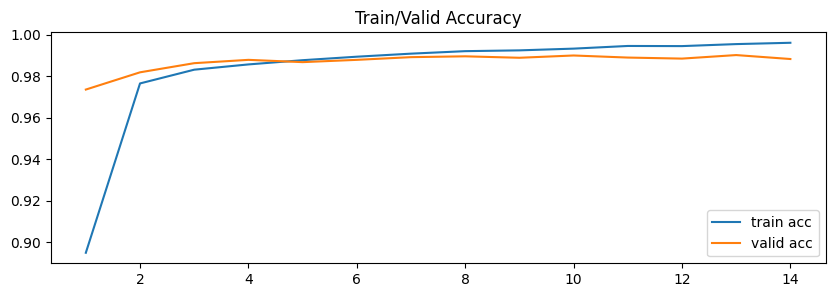

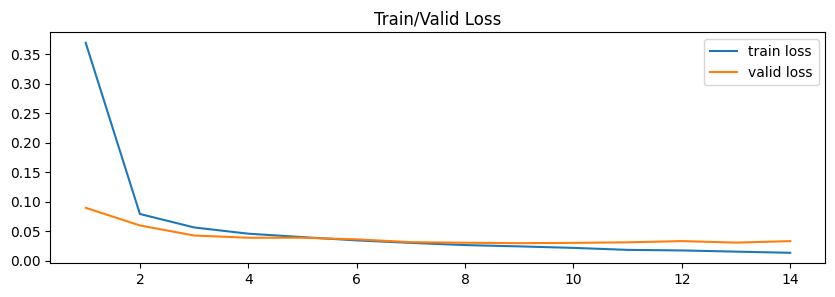

In [41]:
# acc 차트 부분
plt.figure(figsize=(10, 3))

plt.title("Train/Valid Accuracy")

# 훈련용 정확도
plt.plot(range(1,len(train_acc_history) + 1), # x축데이터 (epoch)
         train_acc_history, # y축데이터 (acc)
         label='train acc')

# 검증용 정확도
plt.plot(range(1,len(valid_acc_history)+1), # x축데이터 (epoch)
         valid_acc_history, # y축데이터 (acc)
         label='valid acc')
# 범례
plt.legend()
plt.show()

# loss 차트 부분
plt.figure(figsize=(10, 3))

plt.title("Train/Valid Loss")

# 훈련용 loss
plt.plot(range(1,len(train_loss_history) + 1), # x축데이터 (epoch)
         train_loss_history, # y축데이터 (loss)
         label='train loss')

# 검증용 loss
plt.plot(range(1,len(valid_loss_history)+1), # x축데이터 (epoch)
         valid_loss_history, # y축데이터 (loss)
         label='valid loss')
# 범례
plt.legend()
plt.show()

### 한 개의 손글씨 숫자를 베스트 모델로 인식하기

- 직접 쓴 손글씨 숫자 인식하기
  - 그림판을 이용하여 28x28 크기의 숫자를 써서 저장하고 이미지를 업로드

- CNN 층 더 쌓기

- 모델의 가중치 파라미터 크기 확인

- 손실함수와 최적화함수 설정

#[3] 개/고양이 분류

- https://young2un.tistory.com/154

# [4] 전이학습 (Transfer Learning)

- https://tutorials.pytorch.kr/beginner/transfer_learning_tutorial.html


- 전이학습(Transfer Learning)
  - 매우 큰 데이터셋(예. 100가지 분류에 대해 120만개의 이미지가 포함된 ImageNet)으로 학습된 합성곱 신경망(ConvNet)을 특징 추출기(fixed feature extractor)로 사용하여 학습

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_transfer_learning01.png" width=30%>   
</center>  

  - 훈련시킬 데이터가 충분히 확보되지 못한 경우에 학습 성능을 높여줌
  - 방법
    - 특성 추출(feature extraction) 방식
    - 미세조정(fine-tuning) 방식




- 특성 추출(feature extraction) 방식 : 미리 학습된 CNN 신경망을 가져와서 자신의 설계한 분류기와 연결하고 CNN 신경망은 학습되지 않게 동결하고 분류기만 학습이 되도록 함

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_transfer_learning02.png" width=30%>   
</center>    

- 미세조정(fine tuning)
  - 미리 학습된 CNN 신경망을 가져와서 자신의 설계한 분류기와 연결하고 연결된 층의 일부만 학습되도록 동결 풀어주고 나머지 층의 CNN 신경망은 학습되지 않게 함
  - 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층 (여기에서는 Fully Connected Layer)과 함께 훈련하는 것
  - 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정 → 미세 조정


<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_transfer_learning03.png" width=50%>   
</center>    

- 데이터 세트 크기와 유사도에 따른 파인튜닝의 유형

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/08_transfer_learning04.png" width=60%>   
</center>    